<a href="https://colab.research.google.com/github/AlexTovar31/Challenge_Telecom_2/blob/main/TelecomX_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparacion de los datos

##Librerias utilizadas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
telecomX2 = pd.read_csv('/content/telecomX2.csv')
telecomX2.head()


,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total,Charges_Daily
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


In [3]:
telecomX2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7256 non-null   object 
 1   gender            7256 non-null   object 
 2   SeniorCitizen     7256 non-null   int64  
 3   Partner           7256 non-null   object 
 4   Dependents        7256 non-null   object 
 5   tenure            7256 non-null   int64  
 6   PhoneService      7256 non-null   object 
 7   MultipleLines     7256 non-null   object 
 8   InternetService   7256 non-null   object 
 9   OnlineSecurity    7256 non-null   object 
 10  OnlineBackup      7256 non-null   object 
 11  DeviceProtection  7256 non-null   object 
 12  TechSupport       7256 non-null   object 
 13  StreamingTV       7256 non-null   object 
 14  StreamingMovies   7256 non-null   object 
 15  Contract          7256 non-null   object 
 16  PaperlessBilling  7256 non-null   object 


In [4]:
telecomX2 = telecomX2.drop(['Charges_Daily'], axis=1)

In [10]:
print(telecomX2.shape)

(7256, 20)


In [9]:
print("\nEstadísticas Variables númericas:")
display(telecomX2.describe())


Estadísticas Variables númericas:


,SeniorCitizen,tenure,Charges_Monthly,Charges_Total
count,7256.0000,7256.000000,7256.000000,7256.000000
mean,0.1629,32.395535,64.755423,2280.634213
std,0.3693,24.558067,30.125739,2268.632997
min,0.0000,1.000000,18.250000,18.800000
25%,0.0000,9.000000,35.450000,400.225000
50%,0.0000,29.000000,70.300000,1391.000000
75%,0.0000,55.000000,89.900000,3785.300000
max,1.0000,72.000000,118.750000,8684.800000


In [8]:
print("\nEstadísticas variables categóricas:")
display(telecomX2.describe(include='O'))


Estadísticas variables categóricas:


,Churn,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
count,7256,7256,7256,7256,7256,7256,7256,7256,7256,7256,7256,7256,7256,7256,7256,7256
unique,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,No,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,5387,3669,3747,5086,6551,3490,3198,3607,3181,3194,3581,2895,2866,4005,4308,2445


# Validacion valores faltantes

In [7]:
print(telecomX2.isnull().sum())

Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges_Monthly     0
Charges_Total       0
dtype: int64


In [11]:
for col in telecomX2.columns:
    print(f"\nColumna: {col}")
    print(telecomX2[col].unique())


Columna: Churn
['No' 'Yes']

Columna: gender
['Female' 'Male']

Columna: SeniorCitizen
[0 1]

Columna: Partner
['Yes' 'No']

Columna: Dependents
['Yes' 'No']

Columna: tenure
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42]

Columna: PhoneService
['Yes' 'No']

Columna: MultipleLines
['No' 'Yes' 'No phone service']

Columna: InternetService
['DSL' 'Fiber optic' 'No']

Columna: OnlineSecurity
['No' 'Yes' 'No internet service']

Columna: OnlineBackup
['Yes' 'No' 'No internet service']

Columna: DeviceProtection
['No' 'Yes' 'No internet service']

Columna: TechSupport
['Yes' 'No' 'No internet service']

Columna: StreamingTV
['Yes' 'No' 'No internet service']

Columna: StreamingMovies
['No' 'Yes' 'No internet service']

Columna: Contract
['One year' 'Month-to-month' 'Two year']

Columna: PaperlessBilling
['Yes' 'No']

Col

# Limpieza y tratamiento de datos
Las columnas categóricas con “No internet service” o “No phone service” deben normalizarse.

Convertir Yes/No a 1/0.

Las columnas numéricas quedan tal cual.

Evitar colinealidad fuerte en variables dummy (drop_first=True en get_dummies).

# Unificacion de categorias redundantes

In [12]:
replace_no_service = ['No internet service', 'No phone service']
telecomX2.replace(replace_no_service, 'No', inplace=True)

In [13]:
binarias = ['Churn','gender','Partner','Dependents','PhoneService','PaperlessBilling',
            'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
            'StreamingTV','StreamingMovies']
for col in binarias:
    telecomX2[col] = telecomX2[col].map({'Yes': 1, 'No': 0, 'Female': 0, 'Male': 1})

In [14]:
categoricas_multi = ['MultipleLines','InternetService','Contract','PaymentMethod']
telecomX2 = pd.get_dummies(telecomX2, columns=categoricas_multi, drop_first=True)

In [15]:
print(telecomX2.head())

   Churn  gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0      0       0              0        1           1       9             1   
1      0       1              0        0           0       9             1   
2      1       1              0        0           0       4             1   
3      1       1              1        1           0      13             1   
4      1       0              1        1           0       3             1   

   OnlineSecurity  OnlineBackup  DeviceProtection  ...  Charges_Monthly  \
0               0             1                 0  ...             65.6   
1               0             0                 0  ...             59.9   
2               0             0                 1  ...             73.9   
3               0             1                 1  ...             98.0   
4               0             0                 0  ...             83.9   

   Charges_Total  MultipleLines_Yes  InternetService_Fiber optic  \
0         59

#  Matriz de correlación y gráfico

In [16]:
corr_matrix = telecomX2.corr()

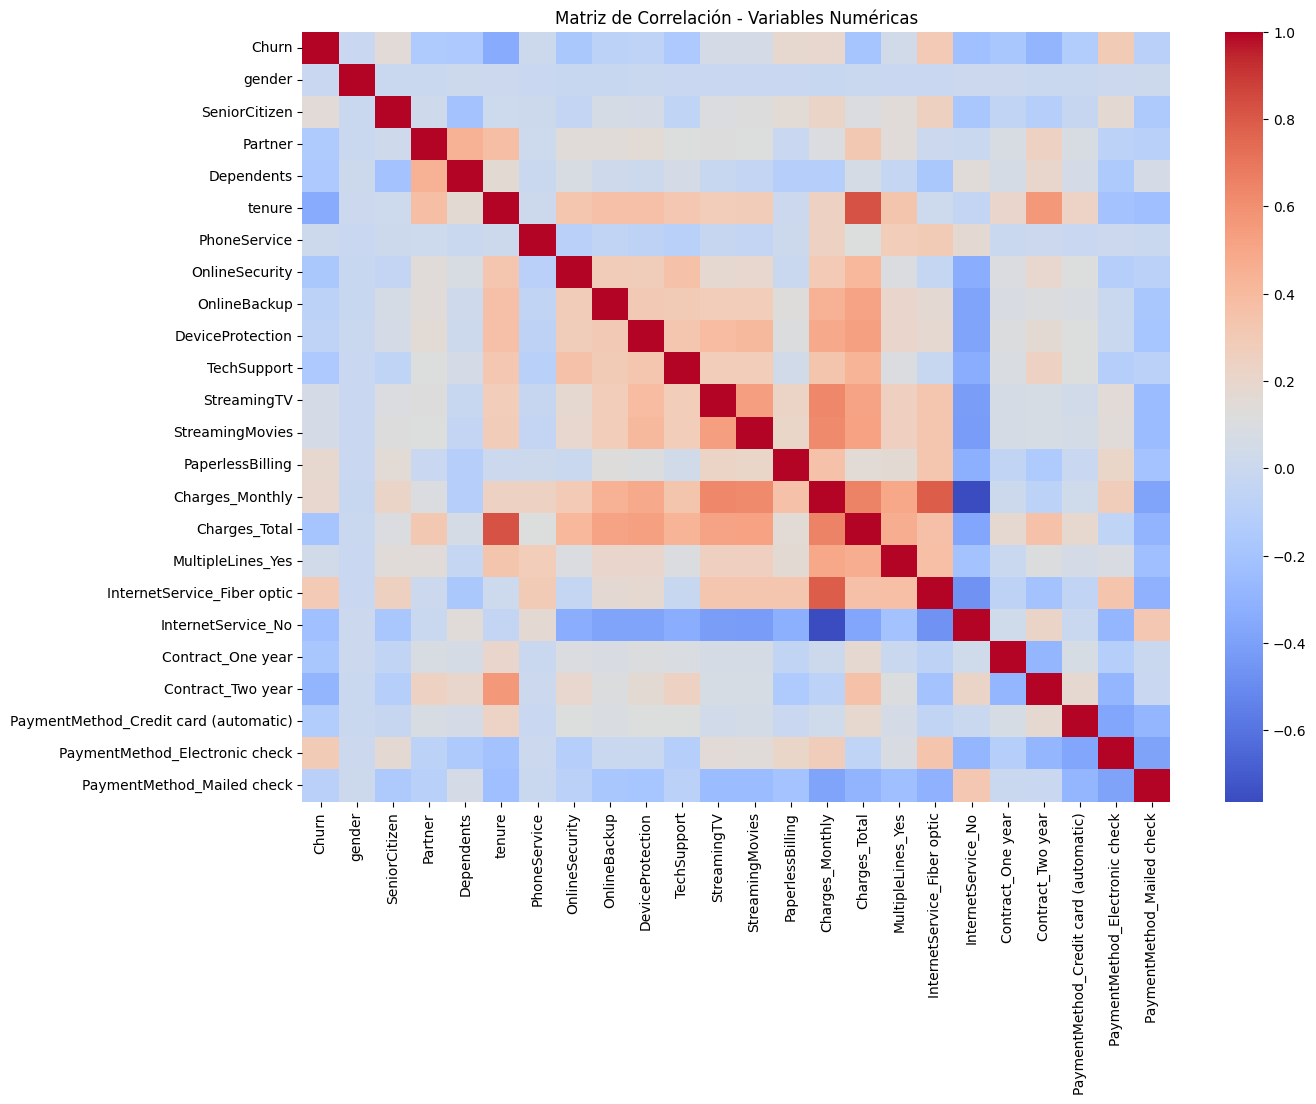

In [17]:
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title("Matriz de Correlación - Variables Numéricas")
plt.show()

In [18]:
target_corr = corr_matrix['Churn'].sort_values(ascending=False)
print(target_corr)

Churn                                    1.000000
InternetService_Fiber optic              0.300416
PaymentMethod_Electronic check           0.294181
Charges_Monthly                          0.189393
PaperlessBilling                         0.186309
SeniorCitizen                            0.146400
StreamingTV                              0.062456
StreamingMovies                          0.060092
MultipleLines_Yes                        0.039277
PhoneService                             0.012337
gender                                  -0.009494
DeviceProtection                        -0.063479
OnlineBackup                            -0.080211
PaymentMethod_Mailed check              -0.089198
PaymentMethod_Credit card (automatic)   -0.131448
Partner                                 -0.148106
Dependents                              -0.160347
TechSupport                             -0.160476
OnlineSecurity                          -0.166865
Contract_One year                       -0.174340


# Selección de variables
Puedes eliminar variables:

Con correlación muy baja con Churn (ej. |coef| < 0.05)

Altamente colineales entre sí (ej. > 0.9)

In [19]:
low_corr = target_corr[abs(target_corr) < 0.05]
print("Variables con correlación baja con Churn:\n", low_corr)

Variables con correlación baja con Churn:
 MultipleLines_Yes    0.039277
PhoneService         0.012337
gender              -0.009494
Name: Churn, dtype: float64


In [20]:
telecomX2 = telecomX2.drop(['MultipleLines_Yes', 'PhoneService', 'gender' ], axis=1)

In [21]:
print(telecomX2.shape)

(7256, 21)


# Definir variable objetivo y features

In [23]:
if telecomX2['Churn'].dtype == 'O':
        telecomX2['Churn'] = telecomX2['Churn'].map({'Yes':1,'No':0}).astype(int)
y = telecomX2['Churn']
X = telecomX2.drop(columns=['Churn'])

print("X shape:", X.shape, "| y mean (tasa churn):", y.mean())

X shape: (7256, 20) | y mean (tasa churn): 0.25757993384785005


#Split estratificado y balanceo con SMOTE (solo en train)

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train:", X_train.shape, "| Test:", X_test.shape, "| churn train:", y_train.mean().round(3))


Train: (5804, 20) | Test: (1452, 20) | churn train: 0.258


# Balanceo

In [25]:
!pip -q install imblearn xgboost
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_bal, y_train_bal = sm.fit_resample(X_train, y_train)

print("Balanceo OK. y_train antes:", y_train.value_counts().to_dict(),
      " | después:", y_train_bal.value_counts().to_dict())

Balanceo OK. y_train antes: {0: 4309, 1: 1495}  | después: {0: 4309, 1: 4309}


# Entrenar Decision Tree, Random Forest y XGBoost

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

dt = DecisionTreeClassifier(
    max_depth=None, min_samples_split=2, random_state=42
)

rf = RandomForestClassifier(
    n_estimators=300, max_depth=None, n_jobs=-1, random_state=42
)

xgb = XGBClassifier(
    n_estimators=600, learning_rate=0.05, max_depth=5,
    subsample=0.9, colsample_bytree=0.9, eval_metric='logloss',
    random_state=42, n_jobs=-1
)

modelos = {
    "Decision Tree": dt,
    "Random Forest": rf,
    "XGBoost": xgb
}

for nombre, modelo in modelos.items():
    modelo.fit(X_train_bal, y_train_bal)
print("Modelos entrenados.")

Modelos entrenados.


# Evaluación: métricas, matriz de confusión y ROC

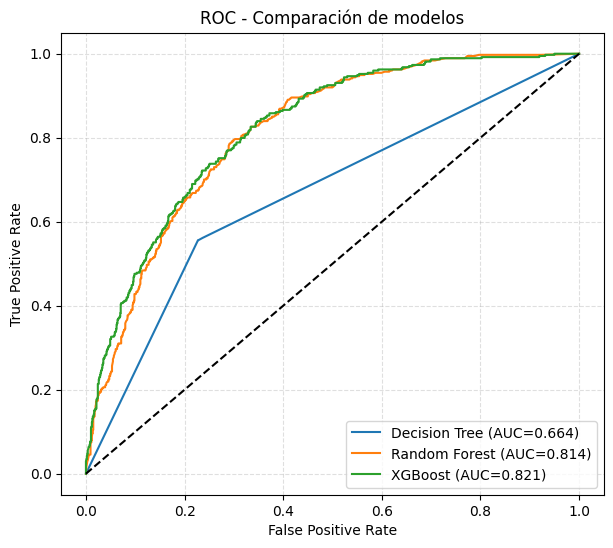

📊 Comparativa de modelos (ordenado por F1):


,Modelo,Accuracy,Precision,Recall,F1-score,ROC-AUC
2,XGBoost,0.774793,0.557740,0.606952,0.581306,0.821276
1,Random Forest,0.772039,0.555556,0.574866,0.565046,0.813798
0,Decision Tree,0.716253,0.458150,0.556150,0.502415,0.664443



===== Decision Tree =====
              precision    recall  f1-score   support

           0       0.83      0.77      0.80      1078
           1       0.46      0.56      0.50       374

    accuracy                           0.72      1452
   macro avg       0.65      0.66      0.65      1452
weighted avg       0.74      0.72      0.72      1452



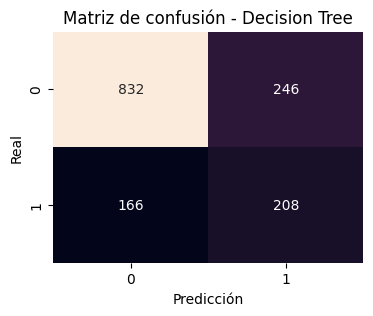


===== Random Forest =====
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1078
           1       0.56      0.57      0.57       374

    accuracy                           0.77      1452
   macro avg       0.70      0.71      0.71      1452
weighted avg       0.77      0.77      0.77      1452



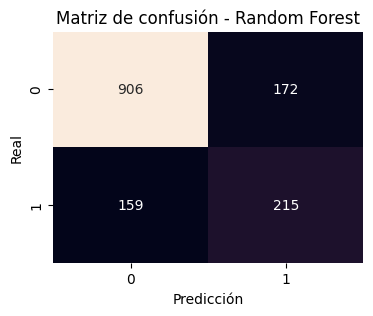


===== XGBoost =====
              precision    recall  f1-score   support

           0       0.86      0.83      0.85      1078
           1       0.56      0.61      0.58       374

    accuracy                           0.77      1452
   macro avg       0.71      0.72      0.71      1452
weighted avg       0.78      0.77      0.78      1452



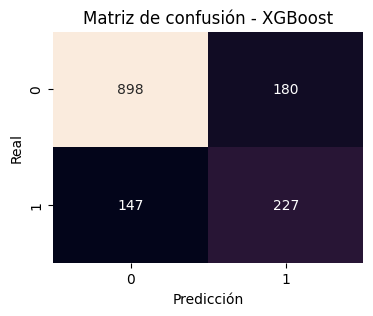

In [144]:
import numpy as np
import pandas as pd
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, classification_report,
                             confusion_matrix, roc_curve)
import matplotlib.pyplot as plt
import seaborn as sns

resultados = []

plt.figure(figsize=(7,6))
for nombre, modelo in modelos.items():
    y_pred = modelo.predict(X_test)
    y_prob = modelo.predict_proba(X_test)[:,1]

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    resultados.append({"Modelo": nombre, "Accuracy": acc, "Precision": prec, "Recall": rec, "F1-score": f1, "ROC-AUC": auc})

    # Curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{nombre} (AUC={auc:.3f})")

# Plot ROC combinado
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC - Comparación de modelos")
plt.legend()
plt.grid(True, ls='--', alpha=.4)
plt.show()

# Tabla comparativa ordenada por F1-score (puedes cambiar a 'ROC-AUC' según tu prioridad)
resultados_df = pd.DataFrame(resultados).sort_values(by="F1-score", ascending=False)
print("📊 Comparativa de modelos (ordenado por F1):")
display(resultados_df)

# Matrices de confusión y reportes
for nombre, modelo in modelos.items():
    y_pred = modelo.predict(X_test)
    print(f"\n===== {nombre} =====")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cbar=False)
    plt.title(f"Matriz de confusión - {nombre}")
    plt.xlabel("Predicción"); plt.ylabel("Real")
    plt.show()

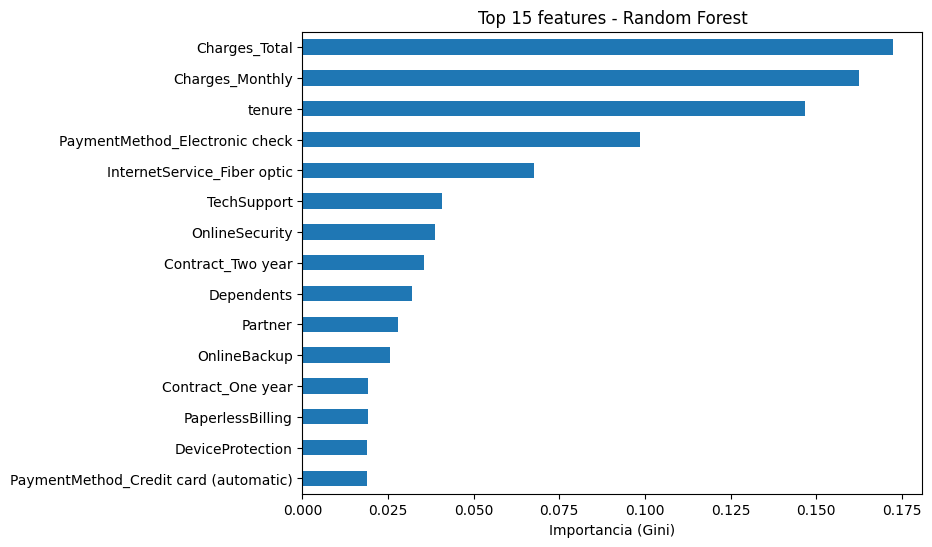

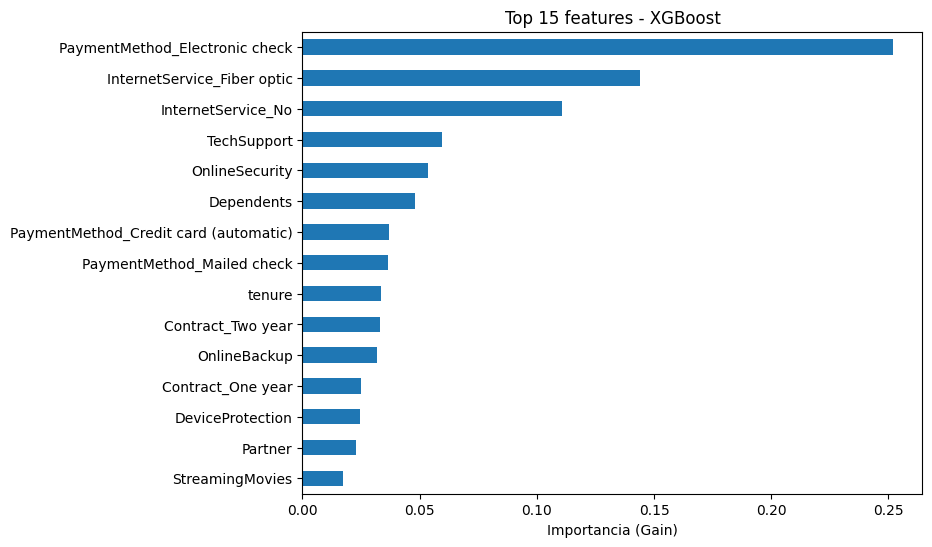

Decision Tree - top features:
 PaymentMethod_Electronic check           0.209107
Charges_Total                            0.181766
tenure                                   0.157260
Charges_Monthly                          0.151515
TechSupport                              0.047985
InternetService_Fiber optic              0.042057
OnlineSecurity                           0.028983
PaymentMethod_Credit card (automatic)    0.022033
Dependents                               0.018777
PaymentMethod_Mailed check               0.018231
dtype: float64

Resumen ejecutivo (borrador):
- Mejor modelo según F1-score: XGBoost
- Variables clave recurrentes (RF & XGB): ['PaymentMethod_Electronic check', 'InternetService_Fiber optic']
- Recomendación: priorizar retención en clientes con combinaciones de estas variables;
  evaluar ofertas de contrato (Contract_*), revisar pricing/cargos (Charges_*),
  y potenciar servicios de soporte/seguridad si aparecen como protectores (TechSupport/OnlineSecurity/DeviceP

In [146]:
# Random Forest
rf_import = pd.Series(modelos["Random Forest"].feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(8,6))
rf_import.head(15).plot(kind='barh')
plt.gca().invert_yaxis()
plt.title("Top 15 features - Random Forest")
plt.xlabel("Importancia (Gini)")
plt.show()

# XGBoost
xgb_import = pd.Series(modelos["XGBoost"].feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(8,6))
xgb_import.head(15).plot(kind='barh')
plt.gca().invert_yaxis()
plt.title("Top 15 features - XGBoost")
plt.xlabel("Importancia (Gain)")
plt.show()

# (Opcional) Árbol de decisión: profundidad y top variables
dt_feat = pd.Series(modelos["Decision Tree"].feature_importances_, index=X.columns).sort_values(ascending=False)
print("Decision Tree - top features:\n", dt_feat.head(10))

# Breve lectura ejecutiva automática
top_rf = rf_import.head(5).index.tolist()
top_xgb = xgb_import.head(5).index.tolist()
interseccion = [f for f in top_rf if f in top_xgb]

print("\nResumen ejecutivo (borrador):")
print(f"- Mejor modelo según F1-score: {resultados_df.iloc[0]['Modelo']}")
print(f"- Variables clave recurrentes (RF & XGB): {interseccion}")
print("- Recomendación: priorizar retención en clientes con combinaciones de estas variables;")
print("  evaluar ofertas de contrato (Contract_*), revisar pricing/cargos (Charges_*),")
print("  y potenciar servicios de soporte/seguridad si aparecen como protectores (TechSupport/OnlineSecurity/DeviceProtection).")

# Validacion cruzada

In [29]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [30]:
print("\n=== Validación Cruzada ===")
for nombre, modelo in modelos.items():
    scores = cross_val_score(modelo, X_train_bal, y_train_bal, cv=5)
    print(f"{nombre}: media={scores.mean():.4f}, std={scores.std():.4f}")



=== Validación Cruzada ===
Decision Tree: media=0.7809, std=0.0692
Random Forest: media=0.8306, std=0.0796
XGBoost: media=0.8275, std=0.0786


# Optimizacion de hiperparametros

In [31]:
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid_rf, cv=3, scoring='accuracy', n_jobs=-1
)
grid_rf.fit(X_train_bal, y_train_bal)
print("\nMejores parámetros Random Forest:", grid_rf.best_params_)



Mejores parámetros Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [36]:
best_rf = grid_rf.best_estimator_
best_rf.fit(X_train_bal, y_train_bal)
y_pred_rf = best_rf.predict(X_test)
print("\nRendimiento Random Forest optimizado:")
print(classification_report(y_test, y_pred_rf))



Rendimiento Random Forest optimizado:
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1078
           1       0.56      0.58      0.57       374

    accuracy                           0.78      1452
   macro avg       0.71      0.71      0.71      1452
weighted avg       0.78      0.78      0.78      1452



# Importancia de variables

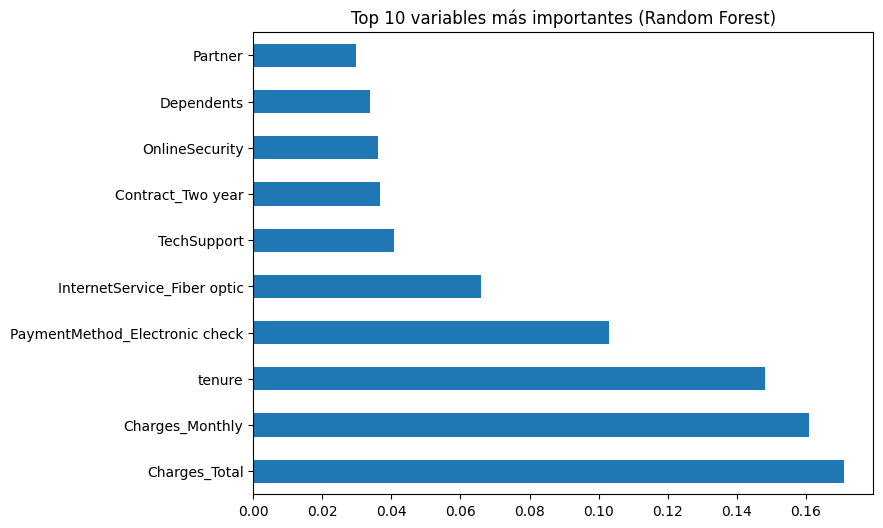

In [39]:
importancias = pd.Series(best_rf.feature_importances_, index=X.columns)
importancias.sort_values(ascending=False).head(10).plot(kind='barh', figsize=(8,6))
plt.title("Top 10 variables más importantes (Random Forest)")
plt.show()

# Analisis grafico de factores claves

#1. Tiempo de contrato vs Cancelación


En la sigueinte grafica compara el tiempo de permanencia (tenure, en meses) de los clientes según el tipo de contrato (Contract), diferenciando entre los que cancelaron y no cancelaron (Churn).


Normalmente, los contratos a largo plazo (por ejemplo, “Two year”) presentan menor tasa de cancelación y mayor tiempo de permanencia. Los contratos mensuales suelen concentrar más cancelaciones.

#2. Gasto total vs Cancelación

En esta grafica distribuye el gasto total (TotalCharges) según si el cliente canceló (Churn=Yes) o no (Churn=No).


Los clientes con menor gasto total suelen ser los que cancelan más, lo que puede indicar que los usuarios nuevos o de bajo consumo son más propensos a irse.

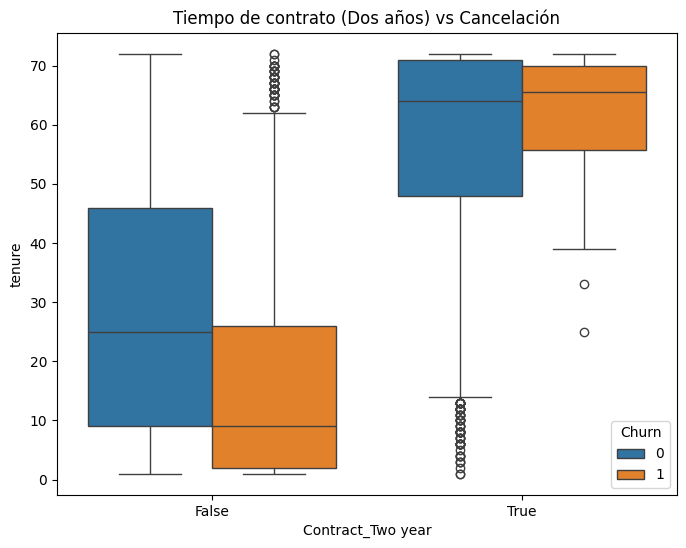

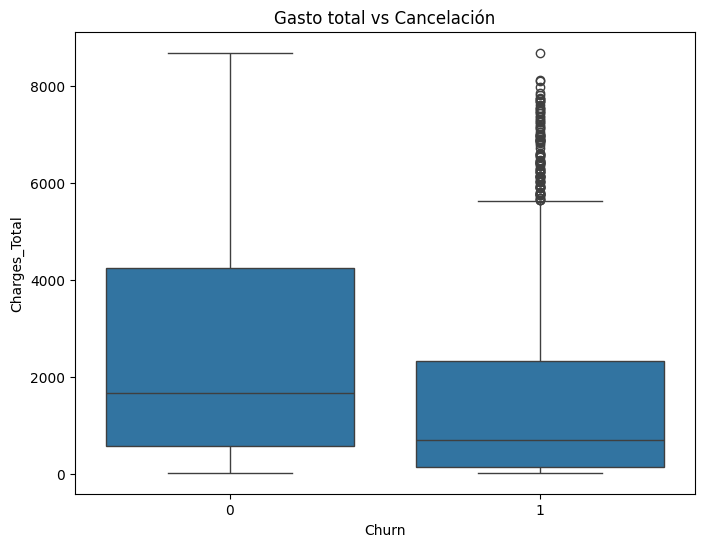

In [38]:
plt.figure(figsize=(8,6))
sns.boxplot(x=telecomX2["Contract_Two year"], y=telecomX2["tenure"], hue=telecomX2["Churn"])
plt.title("Tiempo de contrato (Dos años) vs Cancelación")
plt.show()

plt.figure(figsize=(8,6))
sns.boxplot(x=telecomX2["Churn"], y=telecomX2["Charges_Total"])
plt.title("Gasto total vs Cancelación")
plt.show()

El análisis gráfico revela que los contratos de largo plazo están asociados a mayor permanencia, mientras que los contratos mensuales concentran más cancelaciones. Asimismo, los clientes con menor gasto total presentan mayor probabilidad de cancelar, lo que sugiere que las estrategias de retención deberían enfocarse en los nuevos clientes o en los de bajo consumo.

# **Informe y Conclusiones**

#Factores que más influyen en la cancelación (según importancias de RF/XGB)

Basado en la intersección de importancias de Random Forest y XGBoost (Top-N). Sustituye o matiza con tus listas reales si lo deseas.

**Factores de riesgo alto** (↑ prob. de churn)
Contrato “Month-to-month” (frente a 1 o 2 años).
Mecanismo: baja barrera de salida.

Cargos altos: Charges_Monthly y/o Charges_Total.
Mecanismo: sensibilidad a precio / valor percibido.

Método de pago “Electronic check” (vs automáticos).
Mecanismo: mayor fricción y probabilidad de impagos/disconformidad.

Servicios de valor agregados INACTIVOS: OnlineSecurity_Yes=0, TechSupport_Yes=0, DeviceProtection_Yes=0.
Mecanismo: menor “pegajosidad” y satisfacción.

Tenure bajo (clientes nuevos).
Mecanismo: onboarding débil, expectativas no alineadas.

En algunos casos, InternetService_Fiber optic aparece asociado a mayor churn si el precio/expectativa no se compensa con la calidad percibida.

**Factores protectores (↓ prob. de churn)**
Contrato de 1 o 2 años (Contract_One year, Contract_Two year).

Pagos automáticos (…Credit card (automatic), …Bank transfer (automatic)).

Servicios de soporte/seguridad ACTIVOS (OnlineSecurity_Yes, TechSupport_Yes, DeviceProtection_Yes).

**Hallazgos gráficos típicos**
Tenure vs Churn: churn concentrado en tenures bajos (medianas menores en churn=1).

TotalCharges vs Churn: churn más frecuente en clientes con bajo gasto total (usuarios nuevos) o en subgrupos de alto cargo mensual con baja percepción de valor.

**Segmentos de riesgo (priorización operativa)**
Mes a mes + tenure bajo + cargos mensuales altos
→ objetivo #1 de retención temprana.

Electronic check + mes a mes
→ migración a pagos automáticos + oferta de upgrade de contrato.

Fibra + cargos altos + sin soporte
→ proactive care (revisión QoS), trial de seguridad/soporte y re-anclaje de valor.

Antigüedad baja en cualquier servicio premium
→ onboarding reforzado, educación de uso, contacto proactivo.

**Estrategias de retención basadas en los resultados**
A. Diseñar ofertas por contrato

Upgrade Month-to-month → One/Two year con incentivos:
meses bonificados, instalación/combo gratuitos, beneficios de velocidad o data.

Momento óptimo: días 7–45 (primeras facturas, antes de que cristalice la insatisfacción).

B. Gestión de precio y valor

Bundles que integren OnlineSecurity/TechSupport/DeviceProtection para elevar el valor percibido sin bajar tanto el ARPU.

Descuentos segmentados por score de churn (evita “regalar margen” a clientes sin riesgo).

C. Pagos automáticos

Campaña de migración a Credit card (automatic) o Bank transfer (automatic) con incentivo one-shot (p. ej., 5–10% en próxima factura).

D. Proactive care en fibra y altas expectativas

Monitoreo de KPIs de red y contactabilidad si sube la latencia/quejas.

Mensajería de beneficios tangibles (velocidad real, estabilidad, soporte prioritario).

